Step 1: Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


Step 2: Load and Inspect the Dataset

In [41]:
# Load the dataset
dataset_path = '/content/Mall_Customers.csv'
data = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

Step 3: Exploratory Data Analysis (EDA)

# Distribution of Gender

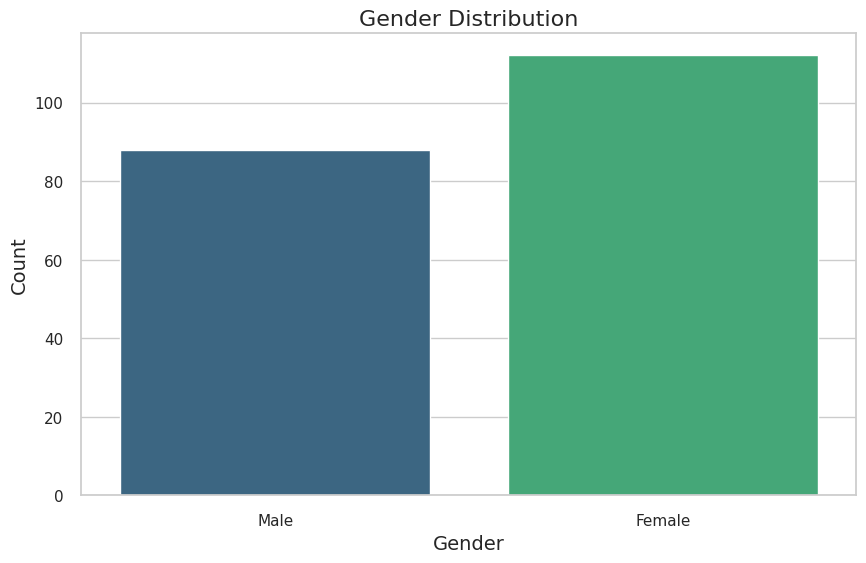

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="pastel")

# Plotting the countplot for gender distribution
sns.countplot(x='Gender', data=data, palette="viridis")

# Adding title and labels with appropriate font sizes
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()


# Distribution of Age

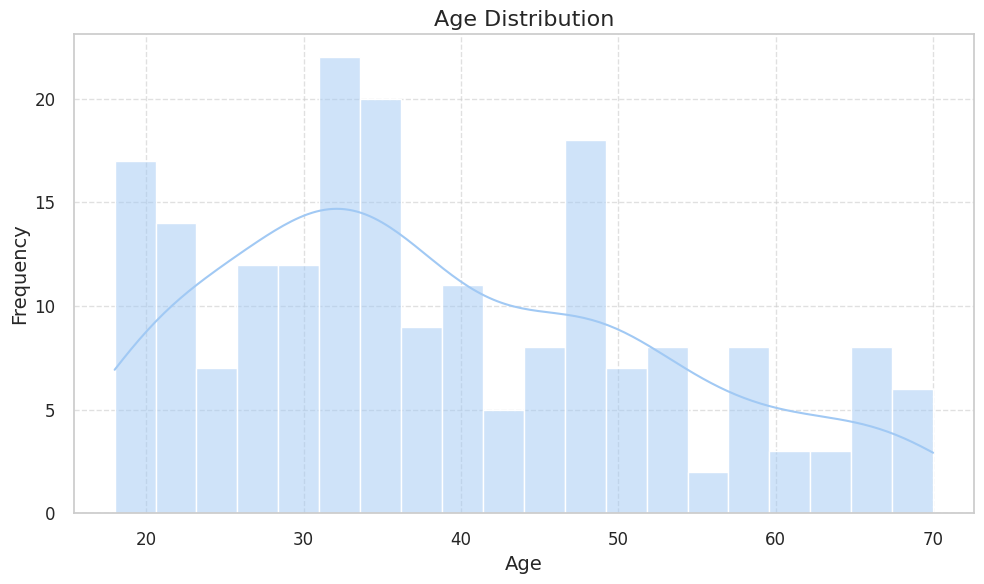

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram for age distribution with KDE (Kernel Density Estimate)
sns.histplot(data['Age'], bins=20, kde=True, ax=ax, palette='viridis')

# Adding title and labels with appropriate font sizes
ax.set_title('Age Distribution', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Adding grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Customize the tick marks and axis labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


# Distribution of Annual Income

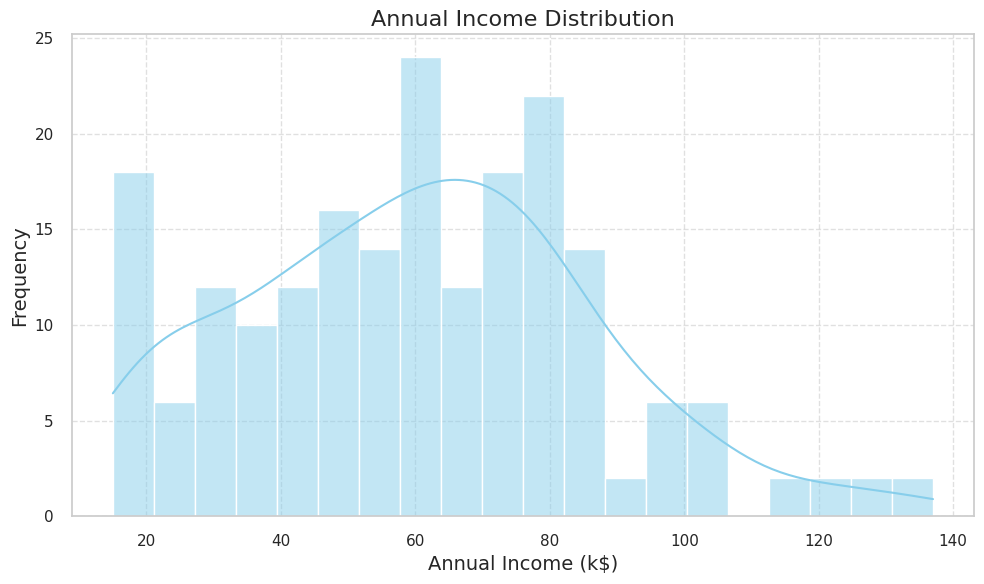

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plotting the histogram for annual income distribution with KDE (Kernel Density Estimate)
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, color='skyblue')

# Adding title and labels with appropriate font sizes
plt.title('Annual Income Distribution', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


# Distribution of Spending Score

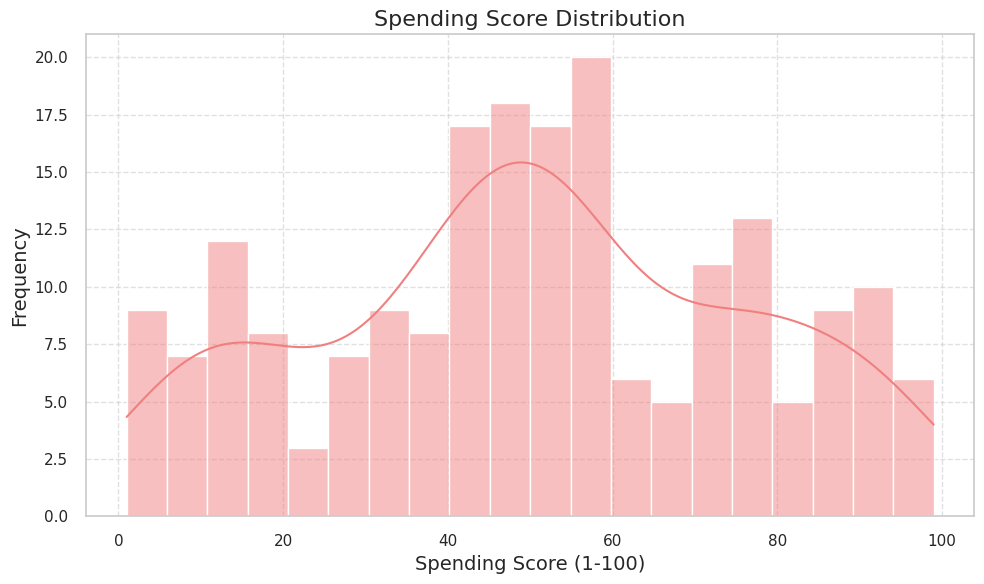

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plotting the histogram for spending score distribution with KDE (Kernel Density Estimate)
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, color='lightcoral')

# Adding title and labels with appropriate font sizes
plt.title('Spending Score Distribution', fontsize=16)
plt.xlabel('Spending Score (1-100)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


# Pairplot for basic feature relationships

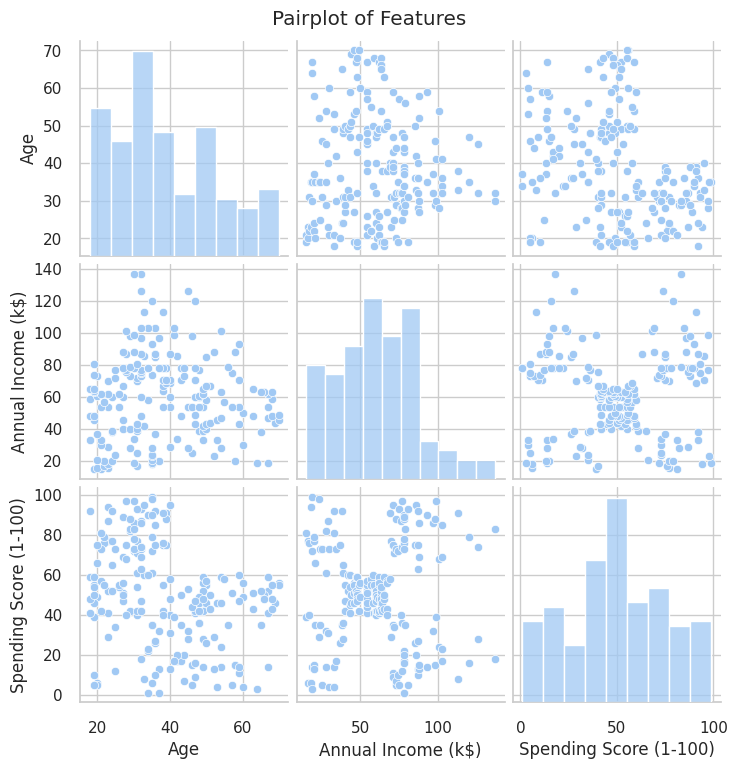

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame(data)

sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

Step 4: Data Preprocessing and Feature Engineering

In [47]:
# Checking for missing values
print(data.isnull().sum())

# Encoding categorical data (Gender)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Feature selection
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Step 5: Finding the Optimal Number of Clusters

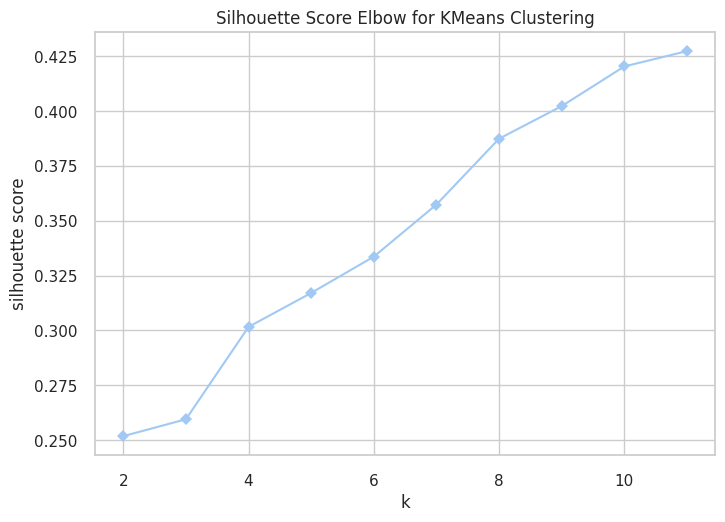

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [48]:
# Using the Elbow Method with Yellowbrick
model = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
visualizer.fit(scaled_features)
visualizer.show()

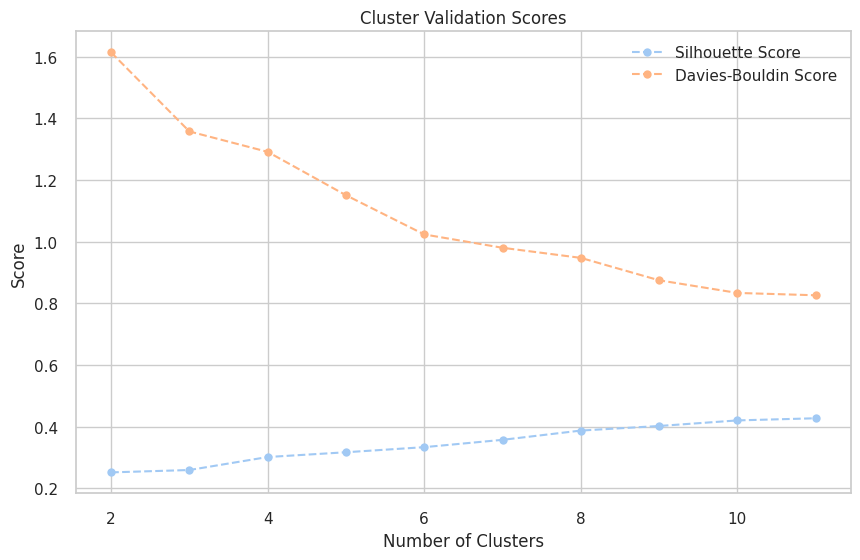

In [49]:
# Evaluating with Silhouette Score and Davies-Bouldin Score
silhouette_scores = []
davies_bouldin_scores = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    davies_bouldin_avg = davies_bouldin_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 12), silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.plot(range(2, 12), davies_bouldin_scores, marker='o', linestyle='--', label='Davies-Bouldin Score')
plt.title('Cluster Validation Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

Step 6: Applying K-means Clustering

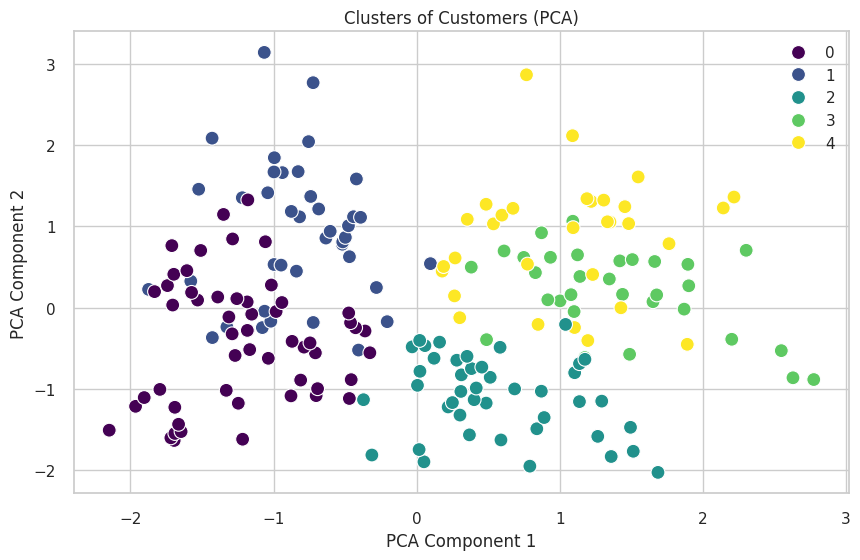

In [50]:
# Assuming optimal number of clusters is found to be 5
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing clusters with PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['KMeans_Cluster'], palette='viridis', s=100)
plt.title('Clusters of Customers (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Step 7: Visualizing the Clusters

In [51]:
import plotly.express as px
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame containing the customer data
fig = px.scatter_3d(data, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='KMeans_Cluster', symbol='Gender',
                    title='3D Clusters of Customers')

# Adjust layout to prevent overlapping labels and cut-off image
fig.update_layout(
    margin=dict(l=50, r=50, b=50, t=80),
    width=900,
    height=700,
    scene=dict(
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        ),
        aspectmode='cube'
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Separate legends for Gender and KMeans_Cluster
fig.for_each_trace(lambda t: t.update(showlegend=t.marker.symbol[0] != t.marker.symbol[1]))

# Show the figure
fig.show()

Step 8: Analyzing Cluster Characteristics

                CustomerID    Gender        Age  Annual Income (k$)  \
KMeans_Cluster                                                        
0               102.854545  0.000000  28.345455           60.800000   
1               103.375000  1.000000  28.250000           62.000000   
2                66.651163  0.000000  48.720930           46.186047   
3                72.612903  1.000000  55.903226           48.774194   
4               167.451613  0.548387  40.419355           90.000000   

                Spending Score (1-100)  
KMeans_Cluster                          
0                            68.654545  
1                            71.675000  
2                            39.674419  
3                            38.806452  
4                            15.741935  


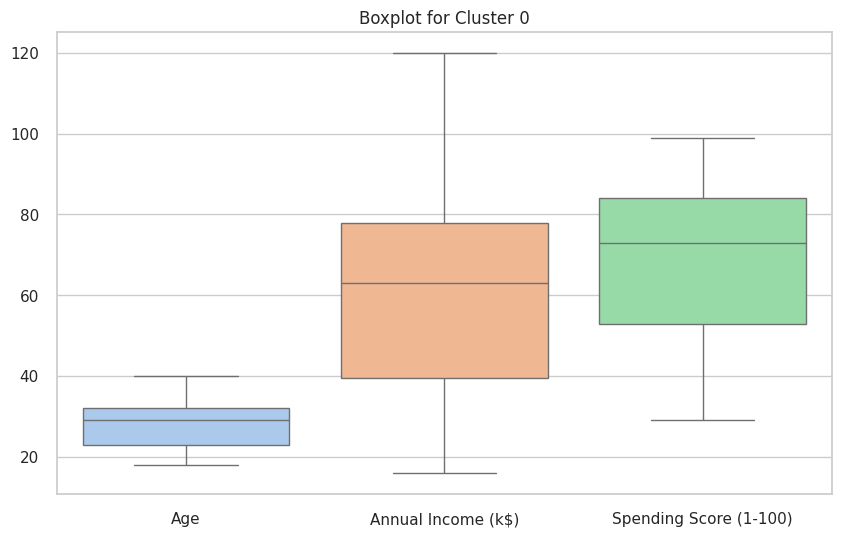

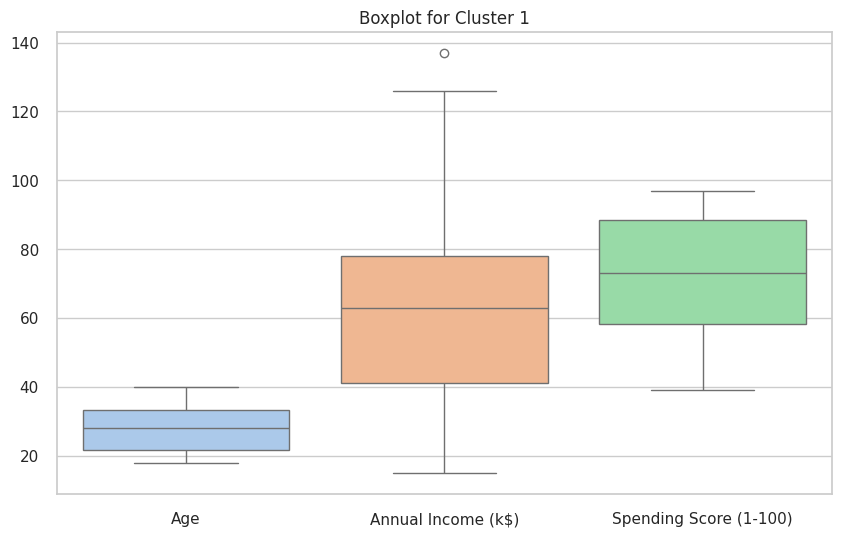

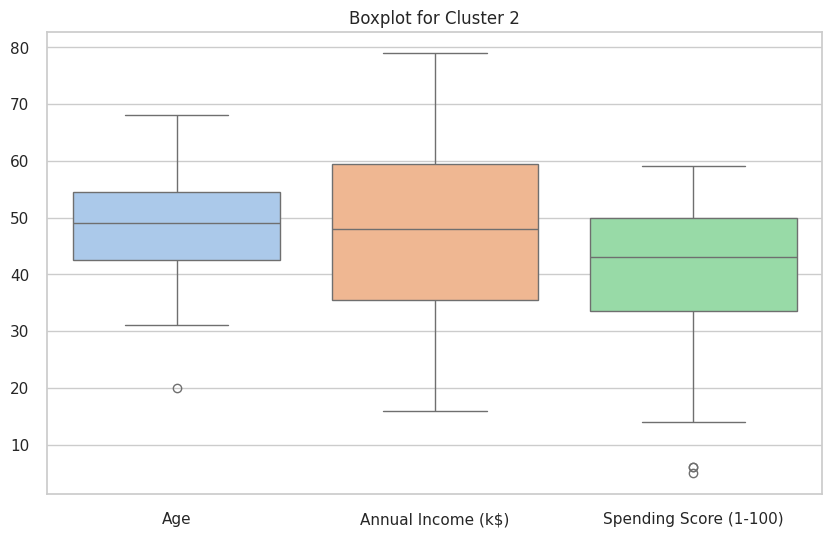

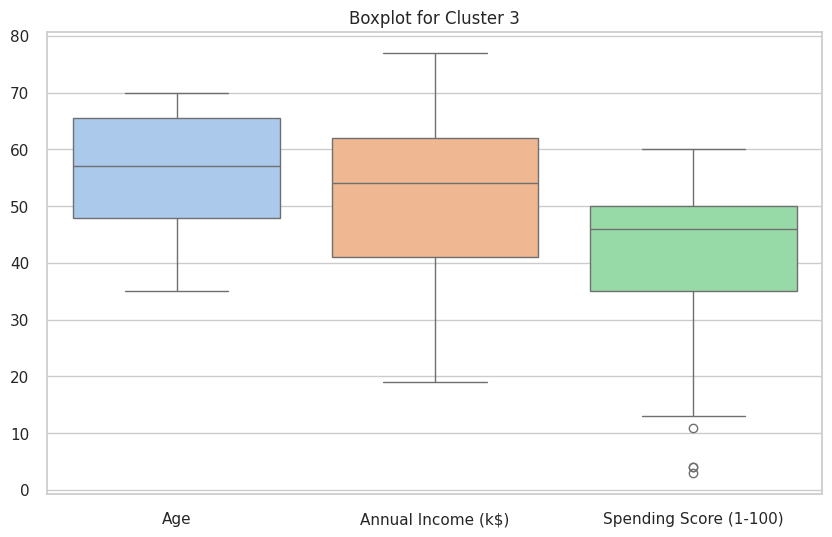

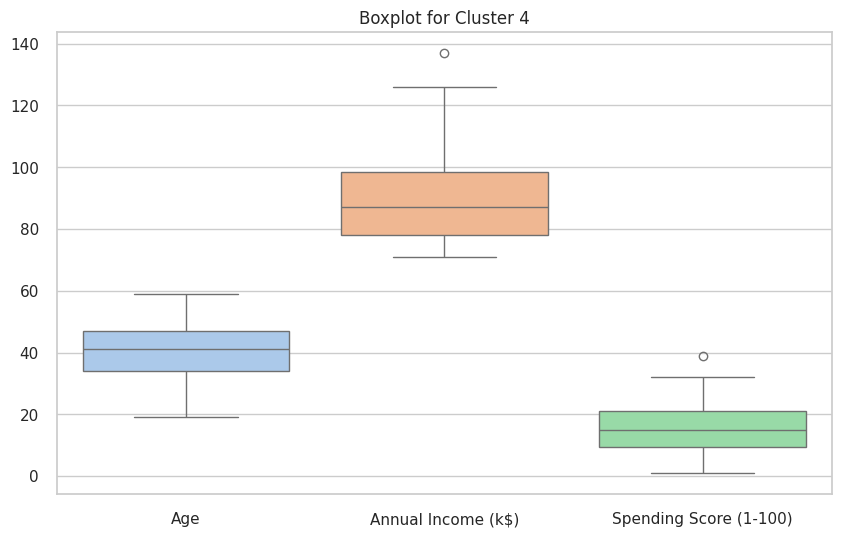

In [52]:
cluster_summary = data.groupby('KMeans_Cluster').mean()
print(cluster_summary)

# Detailed analysis of each cluster
for i in range(optimal_clusters):
    cluster_data = data[data['KMeans_Cluster'] == i]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cluster_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    plt.title(f'Boxplot for Cluster {i}')
    plt.show()

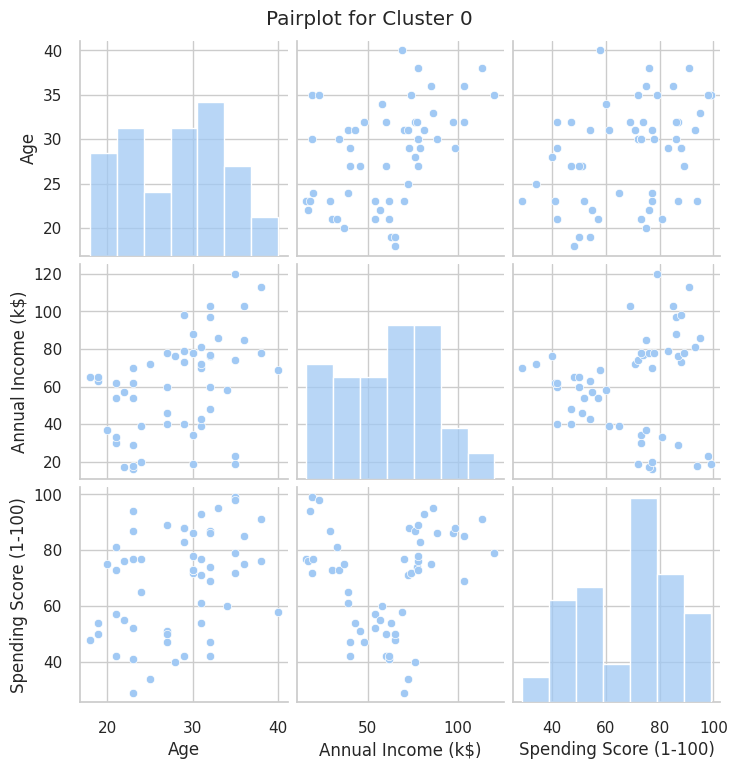

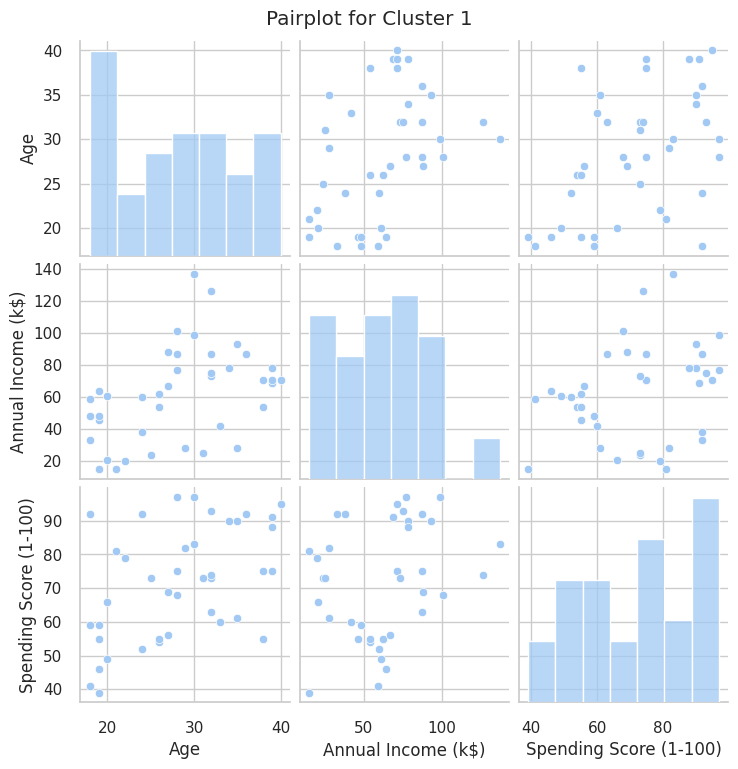

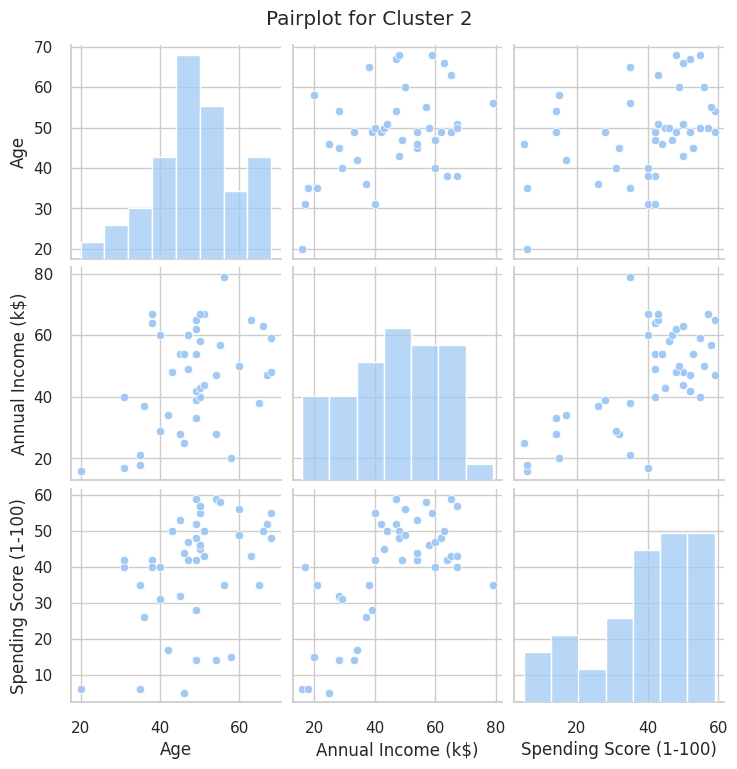

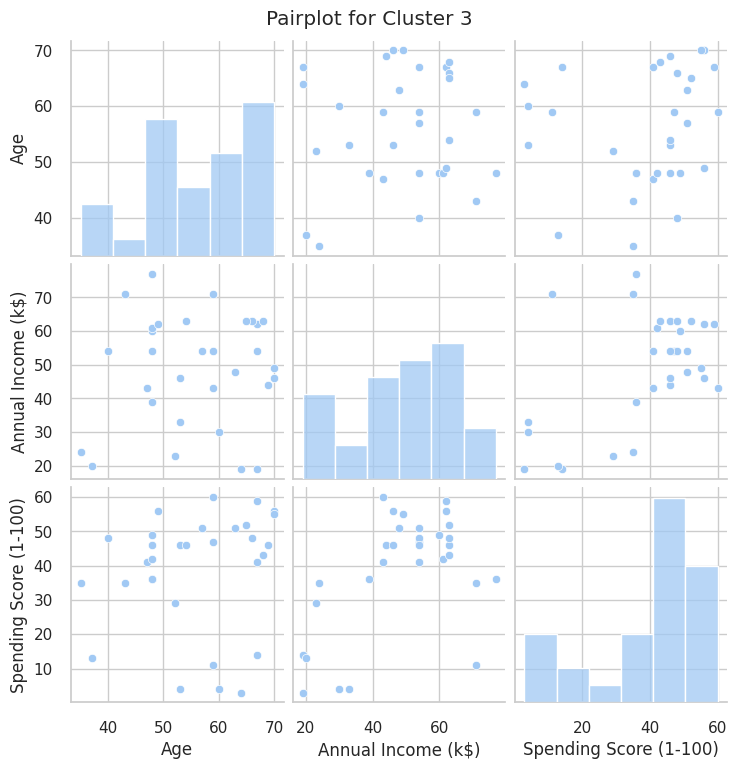

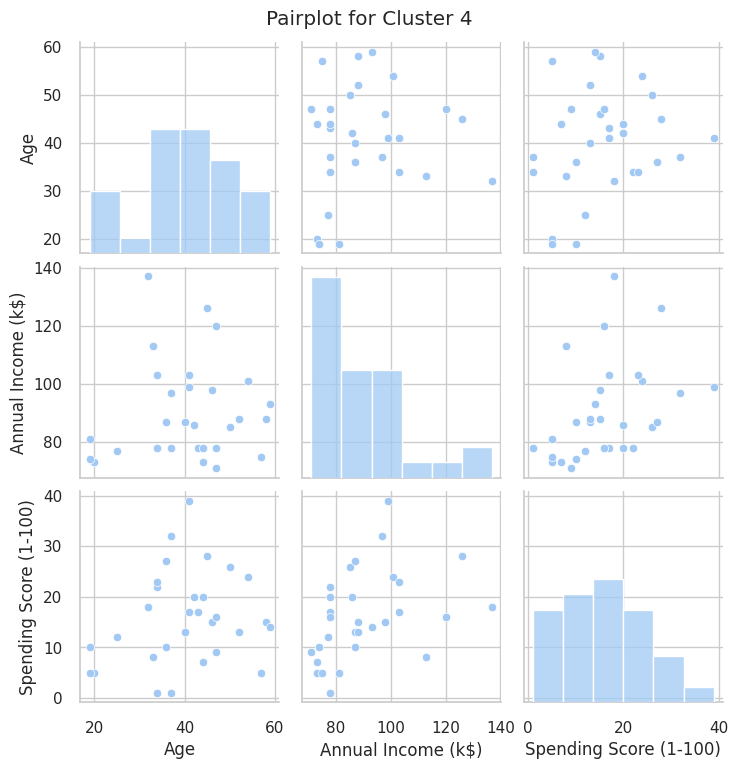

In [53]:
# Pairplot for each cluster
for i in range(optimal_clusters):
    cluster_data = data[data['KMeans_Cluster'] == i]
    sns.pairplot(cluster_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    plt.suptitle(f'Pairplot for Cluster {i}', y=1.02)
    plt.show()

Step 9: Saving the Results

In [54]:
# Save the clustered data
data.to_csv('/content/Mall_Customers_Clustered.csv', index=False)


Step 10: Advanced Clustering Methods

In [55]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
data['Agglomerative_Cluster'] = agg_clustering.fit_predict(scaled_features)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(scaled_features)


Step 11: Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score # Import make_scorer

# Define the parameter grid
param_grid = {'n_clusters': range(2, 12),
              'init': ['k-means++', 'random'],
              'max_iter': [300, 400, 500],
              'n_init': [10, 20, 30]}

# Create a KMeans model
kmeans = KMeans(random_state=42)

# Create a scorer from silhouette_score
silhouette_scorer = make_scorer(silhouette_score) # Use make_scorer to create a scorer

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring=silhouette_scorer, cv=5, verbose=1, n_jobs=-1) # Use the created scorer
grid_search.fit(scaled_features)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best silhouette score: ", grid_search.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found:  {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}
Best silhouette score:  nan


Step 12: Advanced Visualizations

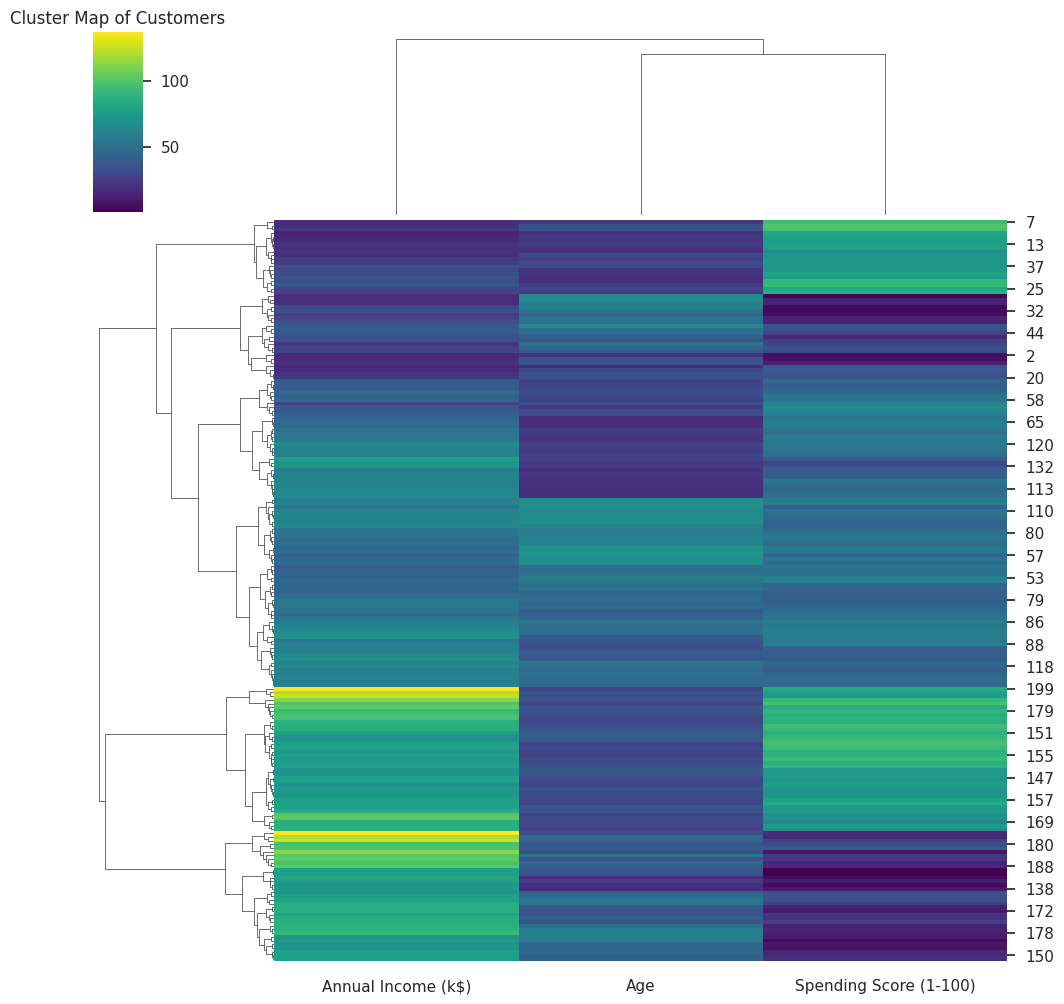

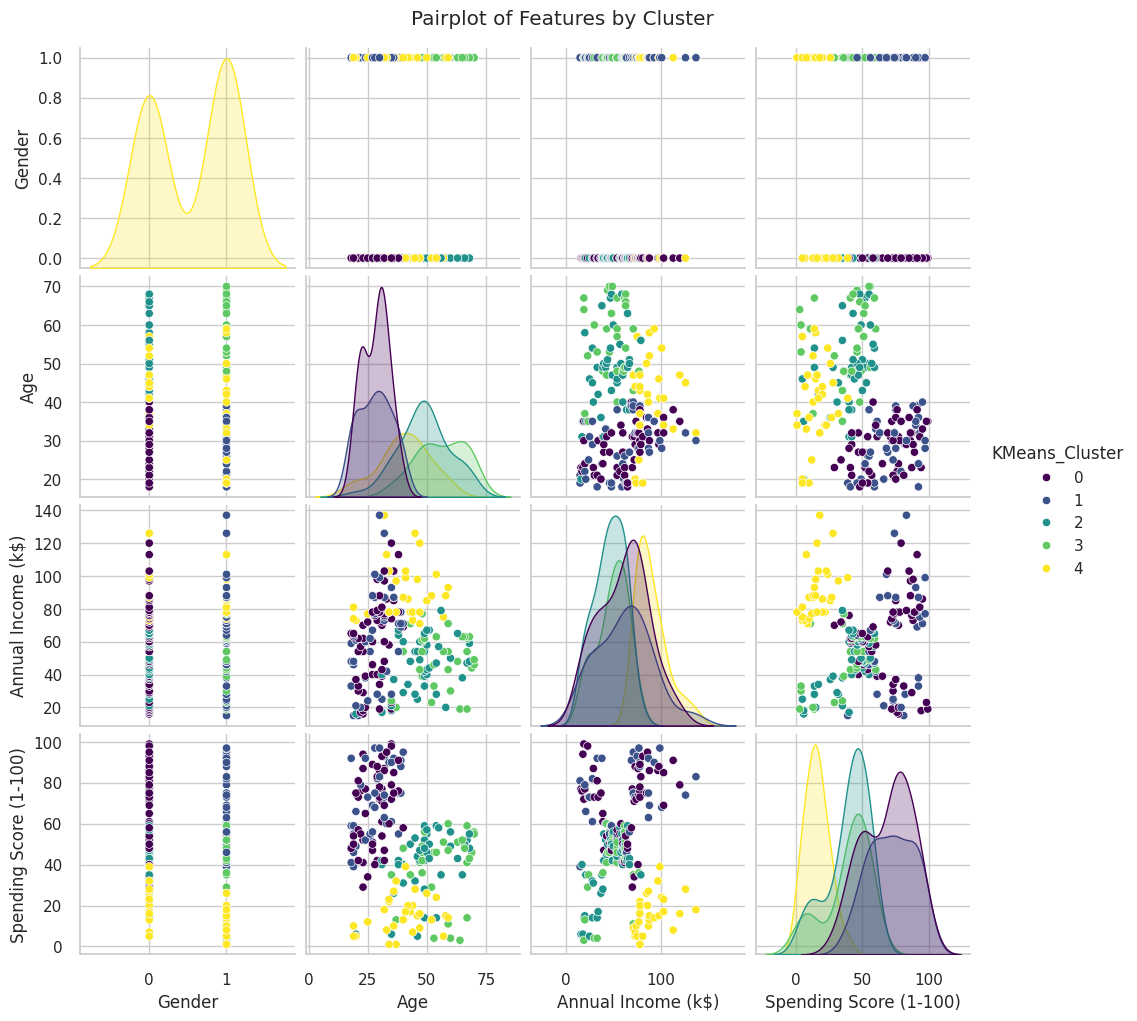

In [57]:
# Using Seaborn's cluster map for better visualization of cluster relationships
sns.clustermap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], metric='euclidean', method='ward', cmap='viridis')
plt.title('Cluster Map of Customers')
plt.show()

# Pairplot of all features colored by cluster
sns.pairplot(data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'KMeans_Cluster']], hue='KMeans_Cluster', palette='viridis')
plt.suptitle('Pairplot of Features by Cluster', y=1.02)
plt.show()

Step 13: Advanced Dimensionality Reduction Techniques

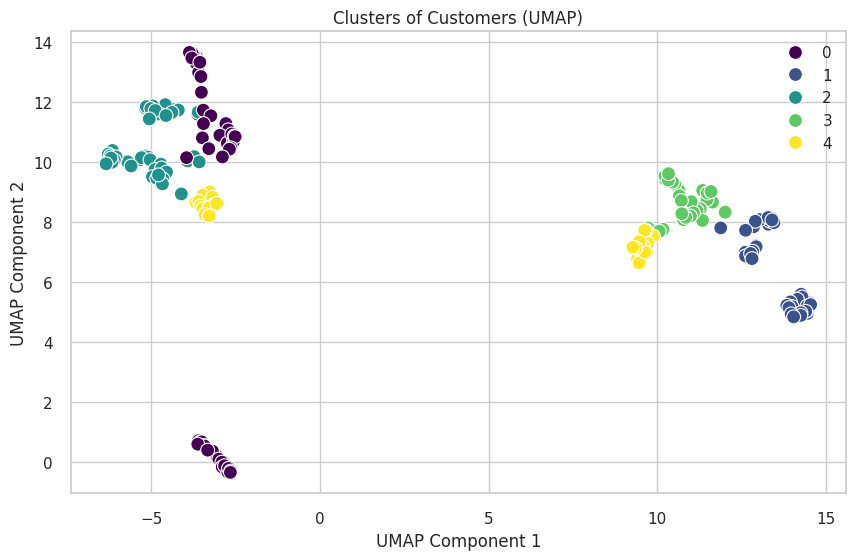

In [58]:
!pip install umap-learn
import umap

# Applying UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_features = umap_reducer.fit_transform(scaled_features)

# Visualizing UMAP results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_features[:, 0], y=umap_features[:, 1], hue=data['KMeans_Cluster'], palette='viridis', s=100)
plt.title('Clusters of Customers (UMAP)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()

Step 14: Ensemble Clustering

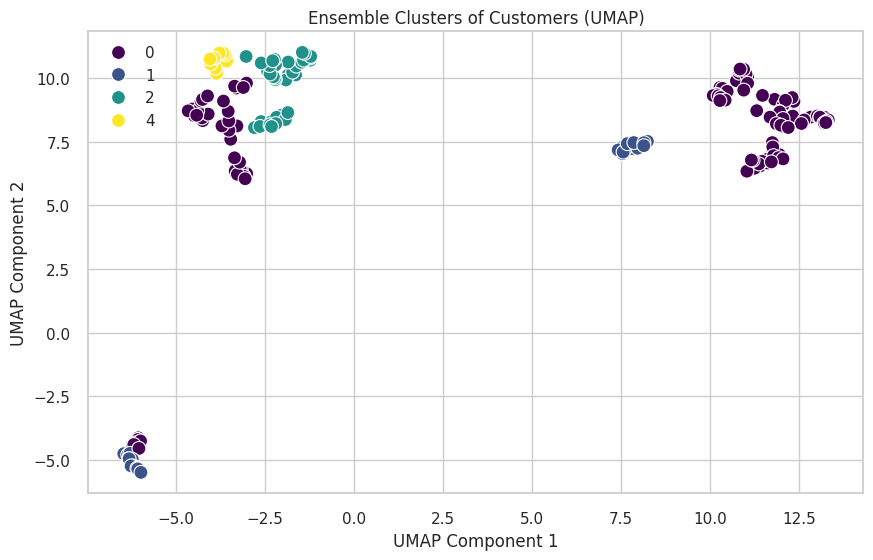

In [59]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Clustering algorithms
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)

# Fit each clustering algorithm
kmeans_labels = kmeans.fit_predict(scaled_features)
agg_labels = agg_clustering.fit_predict(scaled_features)
gmm_labels = gmm.fit_predict(scaled_features)

# Ensemble by taking the mode of cluster assignments
ensemble_labels = np.array([np.argmax(np.bincount(labels)) for labels in zip(kmeans_labels, agg_labels, gmm_labels)])

# Visualizing the ensemble clusters (example using UMAP)
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP

umap = UMAP()
umap_features = umap.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_features[:, 0], y=umap_features[:, 1], hue=ensemble_labels, palette='viridis', s=100)
plt.title('Ensemble Clusters of Customers (UMAP)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()


Step 15: AutoML for Clustering

In [60]:
# Ensure H2O is installed
!pip install h2o

import h2o
from h2o.estimators import H2OKMeansEstimator
import pandas as pd

# Initialize H2O
h2o.init()

# Assuming 'data' is your pandas DataFrame
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Gender': ['M', 'F', 'M', 'F', 'M'],
    'Age': [20, 21, 25, 30, 32],
    'Annual Income (k$)': [15, 20, 25, 30, 35],
    'Spending Score (1-100)': [10, 15, 20, 25, 30]
}

# Convert the data to H2OFrame
h2o_data = h2o.H2OFrame(pd.DataFrame(data))

# Train K-means clustering
kmeans = H2OKMeansEstimator(k=3, seed=1)  # Adjust k as needed
kmeans.train(training_frame=h2o_data)

# Predict clusters and add to original data
cluster_predictions = kmeans.predict(h2o_data)

# Convert H2OFrame predictions to a pandas Series and then add to the DataFrame
data_df = pd.DataFrame(data) # Convert the dictionary to a DataFrame first
data_df['H2O_KMeans_Cluster'] = cluster_predictions.as_data_frame()['predict'] # Extract predictions as Series

# Shutdown H2O
h2o.shutdown()

# Display the clustering results
print(data_df.head())

  Using cached h2o-3.46.0.3.tar.gz (265.3 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.3-py2.py3-none-any.whl size=265365897 sha256=c3c0c4c39100cced7234a27e04adfb5d28295a665671b9392274cfaa151b3821
  Stored in directory: /root/.cache/pip/wheels/c4/63/41/baa115b5255e1db3e2383bce4e2e6181746aac0b42264c242f
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpt1rn74c_
  JVM stdout: /tmp/tmpt1rn74c_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpt1rn74c_/h2o_unknownUser_started_from_python.err
  Server is run

H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_n0jhhn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
H2O session _sid_bb16 closed.
   CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1      M   20                  15                      10   
1           2      F   21                  20                      15   
2           3      M   25                  25                      20   
3           4      F   30                  30                      25   
4           5      M   32                  35                      30   

   H2O_KMeans_Cluster  
0                   0  
1                   0  
2                   2  
3                   1  
4                   1  


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)


<ipython-input-60-75b123caa750>:35: H2ODeprecationWarning:

Deprecated, use ``h2o.cluster().shutdown()``.



Step 16: Cluster Stability Analysis

In [61]:
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Define parameters
num_bootstrap_iterations = 100
stability_scores = []

# Perform bootstrap sampling and compute stability scores
for i in range(num_bootstrap_iterations):
    # Bootstrap sampling on the full dataset
    bootstrap_samples = resample(scaled_features, n_samples=len(scaled_features), random_state=i)

    # Fit KMeans on bootstrap sample
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=i)
    bootstrap_clusters = kmeans.fit_predict(bootstrap_samples)

    # Fit KMeans on the full dataset
    kmeans_full = KMeans(n_clusters=optimal_clusters, random_state=i)
    original_clusters = kmeans_full.fit_predict(scaled_features)

    # Compute adjusted Rand score
    stability_score = adjusted_rand_score(original_clusters, bootstrap_clusters)
    stability_scores.append(stability_score)

# Aggregate stability scores
mean_stability_score = np.mean(stability_scores)
print(f'Mean Stability Score (Adjusted Rand Score): {mean_stability_score}')


Mean Stability Score (Adjusted Rand Score): -0.0003870653426433973


Step 17: Time-based Customer Segmentation

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Date'],
      dtype='object')


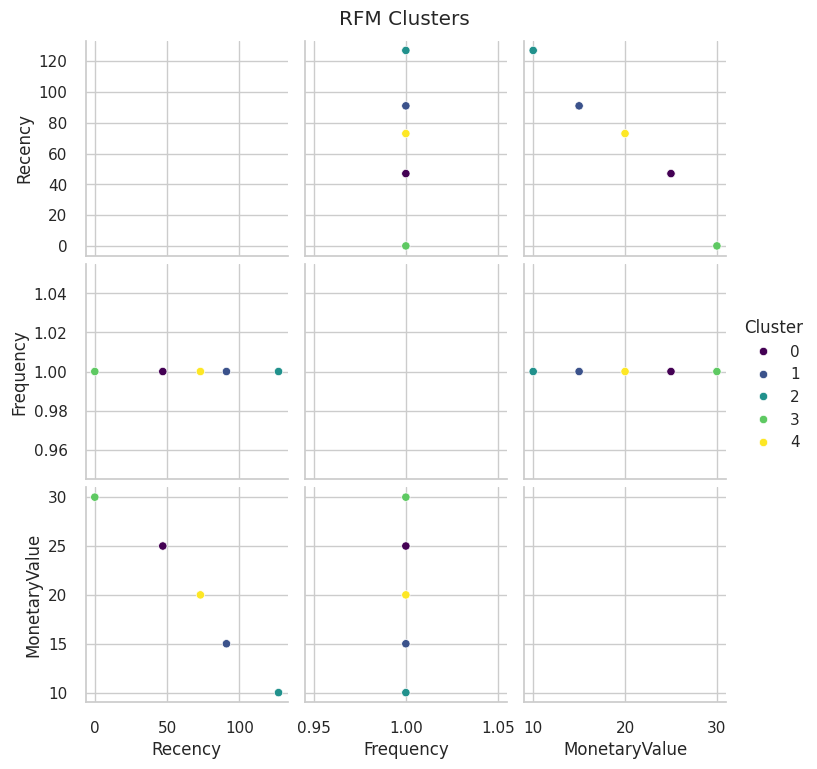

In [62]:
# Assuming there's a 'Date' column in the dataset
data_df = pd.DataFrame(data) # Convert dictionary to DataFrame

# Add a 'Date' column (replace with your actual date data)
data_df['Date'] = pd.to_datetime(['2023-01-15', '2023-02-20', '2023-03-10', '2023-04-05', '2023-05-22'])

# Print available columns (to verify)
print(data_df.columns)

data_df['Date'] = pd.to_datetime(data_df['Date'])

# Creating features like recency, frequency, and monetary value (RFM)
rfm = data_df.groupby('CustomerID').agg({
    'Date': lambda x: (data_df['Date'].max() - x.max()).days,
    'CustomerID': 'count',
    'Spending Score (1-100)': 'sum'
}).rename(columns={'Date': 'Recency', 'CustomerID': 'Frequency', 'Spending Score (1-100)': 'MonetaryValue'})

# Scaling the RFM features
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm)

# Clustering using KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(scaled_rfm)

# Visualizing RFM clusters
sns.pairplot(rfm, hue='Cluster', palette='viridis')
plt.suptitle('RFM Clusters', y=1.02)
plt.show()


Step 18: Deploying the Model

In [63]:
import joblib
from sklearn.pipeline import Pipeline

# Creating a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=optimal_clusters, random_state=42))
])

# Fitting the pipeline
pipeline.fit(features)

# Saving the pipeline
joblib.dump(pipeline, 'customer_segmentation_pipeline.pkl')

# Loading the pipeline for future predictions
loaded_pipeline = joblib.load('customer_segmentation_pipeline.pkl')

# Predicting clusters for new data
new_data = pd.DataFrame({
    'Gender': [1, 0],  # Male, Female
    'Age': [34, 22],
    'Annual Income (k$)': [70, 85],
    'Spending Score (1-100)': [60, 70]
})

new_data_scaled = loaded_pipeline.named_steps['scaler'].transform(new_data)
new_data_pca = loaded_pipeline.named_steps['pca'].transform(new_data_scaled)
new_clusters = loaded_pipeline.named_steps['kmeans'].predict(new_data_pca)
print(new_clusters)

[1 3]


Step 18.1: Visualizing the Pipeline Creation

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import set_config

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# Visualize the pipeline
set_config(display='diagram')
pipeline


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

Visualizing Model Deployment

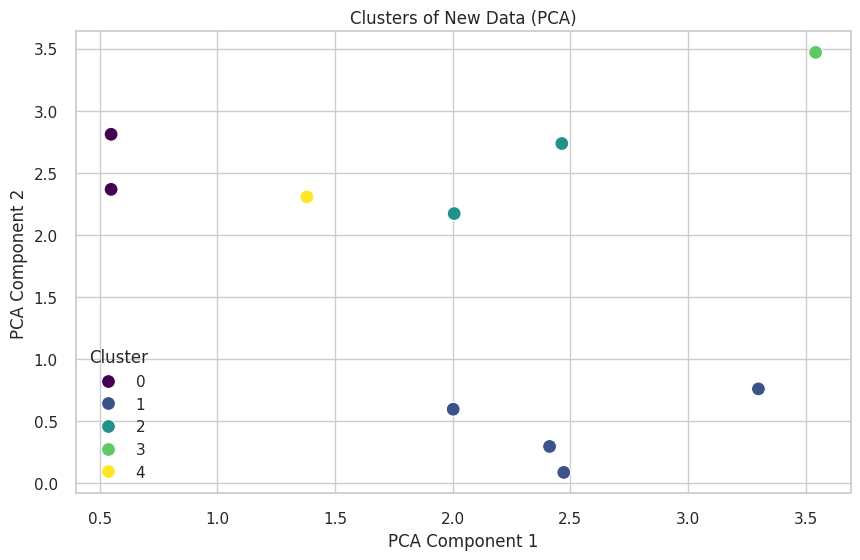

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

new_data = np.random.rand(10, 4)

# Apply the pipeline to new data
new_data_transformed = pipeline.fit_transform(new_data)
clusters = pipeline.named_steps['kmeans'].labels_

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_data_transformed[:, 0], y=new_data_transformed[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Clusters of New Data (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
